

> **Trabajo Práctico 2 - Matrices de Insumo-Producto**


**Consigna 1**

**Consigna 2**

Para graficar los dos vectores pedidos se utilizaron las funciones **elevarMatriz**, que calcula la potencia de A para cada exponente, y **crearVector**, que ubica la norma de las potencias de A en las posiciones del vector. Luego se realizó un gráfico de cada vector.

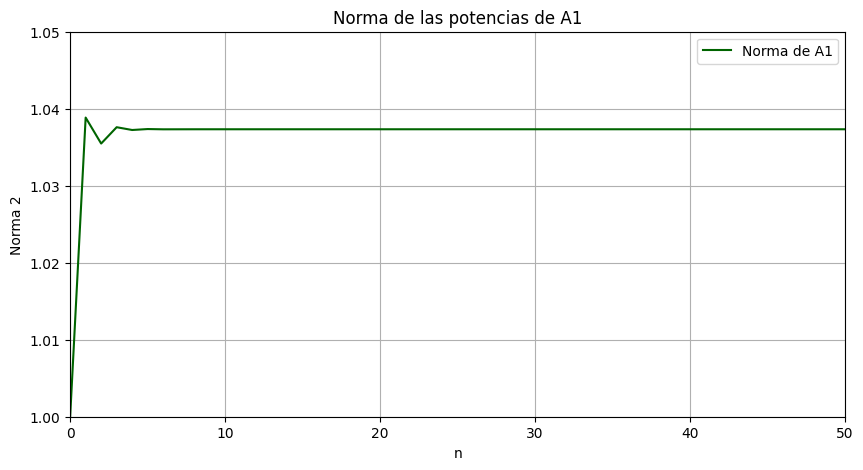

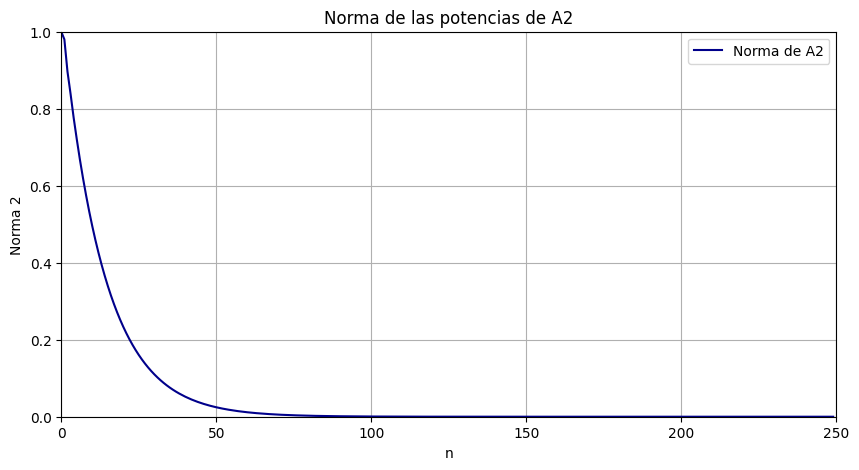

In [ ]:
import numpy as np
import scipy.linalg as sc
import matplotlib.pyplot as plt

def elevarMatriz(A,i):
    matrizElevada = np.eye(A.shape[0])
    for j in range(i):
        matrizElevada = np.dot(matrizElevada,A)
    return matrizElevada

def crearVector(A):
    vector = np.zeros(250)
    for i in range(0, 250, 1):
        vector[i] = (sc.norm(elevarMatriz(A,i), ord=2))
    return vector

A1 = np.array([[0.186, 0.521, 0.014, 0.32, 0.134],
               [0.24, 0.073, 0.219, 0.013, 0.327],
               [0.098, 0.12, 0.311, 0.302, 0.208],
               [0.173, 0.03, 0.133, 0.14, 0.074],
               [0.303, 0.256, 0.323, 0.225, 0.257]])

vector1 = crearVector(A1)

A2 = np.array([[0.186, 0.521, 0.014, 0.32, 0.134],
               [0.24, 0.073, 0.219, 0.013, 0.327],
               [0.098, 0.12, 0.311, 0.302, 0.208],
               [0.173, 0.03, 0.133, 0.14, 0.074],
               [0.003, 0.256, 0.323, 0.225, 0.257]])

vector2 = crearVector(A2)

# Gráfico de la norma de A1
plt.figure(figsize=(10, 5))
plt.plot(vector1, label='Norma de A1', color='darkgreen')
plt.title('Norma de las potencias de A1')
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.xlim(0, 50)
plt.ylim(1, 1.05)
plt.grid()
plt.legend()
plt.show()

# Gráfico de la norma de A2
plt.figure(figsize=(10, 5))
plt.plot(vector2, label='Norma de A2', color='darkblue')
plt.title('Norma de las potencias de A2')
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.xlim(0, len(vector2))
plt.ylim(0, 1)
plt.grid()
plt.legend()
plt.show()

Estos gráficos nos dan un indicio de que la serie de potencias de A2 converge mientras la de A1 no. Para A2 todas sus potencias tienen un valor menor que 1, lo que nos indica que todos sus autovalores son menores que 1 en módulo. Por lo tanto, las potencias de A disminuye a medida que su exponente aumenta y lleva a la convergencia de la serie de potencias.

**Consigna 3**

Para encontrar el mayor autovalor de las matrices A1 y A2 se utilizaron las funciones **metodoDeLaPotencia** y **obtenerAutovalorAproximado**. Se implementó el método Monte Cralo para calcular un promedio de los autovalores de 250 vectores distintos.

In [ ]:
import pandas as pd
def metodoDeLaPotencia(A, k):
    v = np.random.rand(A.shape[0])
    for i in range(k):
        v_siguiente = A @ v
        v = v_siguiente / np.linalg.norm(v_siguiente,2)
    return(v)

def obtenerAutovalorAproximado(A,v):
    autovalor = np.dot(v, np.dot(A,v)) / np.dot(v,v)
    return autovalor


def monteCarlo(A):
    lista_de_autovalores = []
    k = 50
    for i in range(250):
        v = metodoDeLaPotencia(A, k)
        autovalor_aproximado = obtenerAutovalorAproximado(A, v)
        lista_de_autovalores.append(autovalor_aproximado)
    promedio = np.mean(lista_de_autovalores)
    desvio_estandar = np.std(lista_de_autovalores)
    return promedio, desvio_estandar

promedio1, desvio_estandar1 = monteCarlo(A1)

promedio2, desvio_estandar2 = monteCarlo(A2)

data = {
    'Matriz': ['A1', 'A2'],
    'Promedio Autovalor': [promedio1, promedio2],
    'Desviación Estándar': [desvio_estandar1, desvio_estandar2]
}

print(pd.DataFrame(data))

  Matriz  Promedio Autovalor  Desviación Estándar
0     A1            1.000000         0.000000e+00
1     A2            0.927651         1.321119e-16


**Consigna 4**

a) Para graficar la serie de potencias $(I-A)^{-1}$ para A1 y A2 se utilizó la función **serieDePotencias**.


In [ ]:
def serieDePotencias(A, n):
    suma = np.zeros(A.shape[0])
    for i in range(n + 1):
        suma = suma + elevarMatriz(A, i);
    return suma

print('serie de potencias para A1 y n = 10')
print(serieDePotencias(A1, 10))

print('serie de potencias para A1 y n = 100')
print(serieDePotencias(A1, 100))

print('serie de potencias para A2 y n = 10')
print(serieDePotencias(A2, 10))

print('serie de potencias para A2 y n = 100')
print(serieDePotencias(A2, 100))

serie de potencias para A1 y n = 10
[[3.19731434 2.47892554 1.96855025 2.22396446 2.1444442 ]
 [2.04535707 2.92312712 2.03450878 1.8434572  2.13633292]
 [1.85652848 1.84612975 3.11785899 2.09969214 1.96529376]
 [1.11850995 1.00035626 1.06845451 2.11087494 1.00949501]
 [2.78229015 2.75146133 2.81062746 2.72201127 3.74443411]]
serie de potencias para A1 y n = 100
[[22.97561228 22.25722415 21.74684827 22.00226293 21.92274209]
 [20.24682577 21.12459543 20.23597743 20.04492558 20.33780164]
 [19.50894394 19.49854538 20.77027447 19.75210775 19.61770921]
 [10.6031775  10.48502353 10.55312202 11.59554226 10.49416257]
 [27.66544051 27.63461151 27.69377781 27.60516148 28.62758449]]
serie de potencias para A2 y n = 10
[[2.27079386 1.90577835 1.61703175 1.75886159 1.71894776]
 [1.08914895 2.31250505 1.64395298 1.34046378 1.6720076 ]
 [0.99606914 1.30718931 2.78156406 1.65964622 1.56126249]
 [0.6853276  0.73398086 0.90625319 1.89524085 0.81255965]
 [0.92984638 1.46717371 1.90292416 1.6233926  2.7091

b) ¿Hay convergencia para ambas matrices? Argumentar la respuesta. <br>
Hay convergencia para $A_2$ pero no para $A_1$. Como se puede observar, los valores de los elementos de $A_2$ crecen en pequeña medida al aumentar el n de 10 a 100. Sin embargo, para $A_1$ los valores crecen en gran proporción.


c) ¿Podría establecer una regla por la cual se pueda asegurar convergencia de la serie infinita? <br>
Como se explicó un poco en la consigna 2 hay varios motivos que llevan a la convergencia de la serie infinta. Para comenzar las normas de las potencias de $A_2$ tienden a 0 al aumentar el exponente, entonces los términos de la serie van disminuyendo y la serie converge a una serie finita. Esto se debe a que los autovalores de $A_2$ son menores a 1 en módulo porque, sino fuera así, el autovalor de módulo mayor a 1 dominaría la matriz $A^{k}$ llevando a la serie de potencias a tender a infinito.

d)

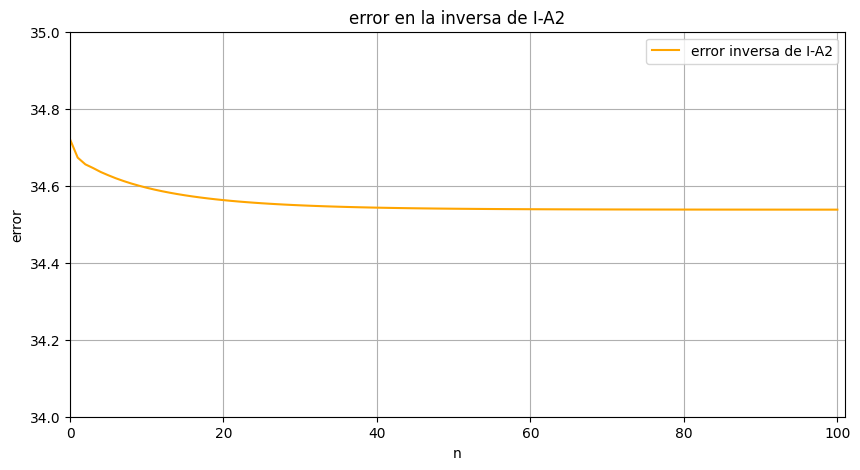

In [ ]:
from scipy.linalg import solve_triangular
'''
intercambiarfilas
Esta función toma una matriz A y cambia de lugar dos filas elegidas
'''
def intercambiarfilas(A, fila1, fila2):
    A[[fila1, fila2]] = A[[fila2, fila1]]
    return A

'''
Facotirzación LU
Esta función toma a una matriz A  y le calcula su factorización LU
con permutaciones si es necesario
'''

def calcularLU(A):
    m, n = A.shape
    '''Si no es matriz cuadrada, no es invertible,
    entonces no podemos calcular la factorización LU'''
    if m != n:
        print('Matriz no cuadrada')
        return
    '''
    Iniciamos el vector de permutaciones
    '''
    P = np.eye(n)
    Ac = A.copy()
    '''
    Recorremos las filas de la matriz A y si el pivote es cero, intercambiamos
    la fila con la siguiente
    '''
    for fila in range(m):
        if Ac[fila, fila] == 0:
            '''
            Nos aseguramos de no estar en la última fila
            '''
            if fila + 1 < m:
                intercambiarfilas(Ac, fila, fila + 1)
                intercambiarfilas(P, fila, fila + 1)
            else:
                print("La matriz no tiene factorización LU.")
                return
        '''Recorremos la matriz Ac. En cada paso, se calcula un factor
        y se utiliza para restar las filas y obtener la eliminación gaussiana'''
        for i in range(fila + 1, m):
            factor = Ac[i, fila] / Ac[fila, fila]
            Ac[i, fila] = factor
            Ac[i, fila + 1:] -= factor * Ac[fila, fila + 1:]
        '''Calculamos las matrices L y U que componen la factorización LU de la matriz original.
        L toma la parte triangular inferior estricta de la matriz Ac y le añadimos una matriz identidad'''
        L = np.tril(Ac, -1) + np.eye(m)
        U = np.triu(Ac)
    return L, U, P

'''
inversaLU
Esta función toma la descomposición LU de una matriz y
calcula la inversa de la misma
'''
def inversaLU(L, U, P):
    n = L.shape[0]
    Inv = np.zeros((n, n))  # Inicializa una matriz de ceros
    id = np.eye(n)  # Crea una matriz identidad

    for i in range(n):
        y = solve_triangular(L, np.dot(P, id[:, i]), lower=True)  # Resuelve L * y = P * e_i
        x = solve_triangular(U, y)  # Resuelve U * x = y
        Inv[:, i] = x  # Almacena la columna en Inv

    return Inv


def crearVectorError(A, inversa, n):
    e = np.zeros(n + 1)
    for i in range(n + 1):
        e[i] = sc.norm((serieDePotencias(A, i) - inversa),2)
    return e

L2, U2, P2 = calcularLU(A2)
inversa_A2 = inversaLU(L2, U2, P2)

e2_10 = crearVectorError(A2, inversa_A2, 10)
e2_100 = crearVectorError(A2, inversa_A2, 100)

plt.figure(figsize=(10, 5))
plt.plot(e2_100, label='error inversa de I-A2', color='orange')
plt.title('error en la inversa de I-A2')
plt.xlabel('n')
plt.ylabel('error')
plt.xlim(0, len(e2_100))
plt.ylim(34, 35)
plt.grid()
plt.legend()
plt.show()